# Brand Co. Client Segmentation

Clustering using Unsupervised Learning Algorithms: K-Means

## Import libraries

In [38]:
# data
# ==============================================================================
import numpy as np
import pandas as pd

# charts
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation as R

# pre-processing 
# ==============================================================================
from sklearn.preprocessing import StandardScaler

#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#display
# ==============================================================================
pd.set_option('display.max_columns',None)

## Import dataset

In [39]:
data_women = pd.read_csv('../data/clean/data_clean_women.csv')

In [40]:
data_women.head()

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,76154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,0,1,2,0,2,4,1,0,0,5
1,292032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,6,3,1,5,2,1,3,0,2,10,0,12
2,513675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,2,1,1,33,2,8,18,3,5,17,6,7,8,30,51
3,514314,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,7,0,12,9,14,8,3,24,10,4,14,19,0,2,34,55
4,517104,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,2,0,2


In [41]:
client_id = data_women['client_id']

In [42]:
data_women_model = data_women.drop(columns=['client_id','total_sum'],axis=1)
data_women_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,0,1,2,0,2,4,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,6,3,1,5,2,1,3,0,2,10,0


## Clustering | K-Means

### Normalization

In [43]:
data_women_model.columns

Index(['residence_country 1', 'residence_country 2', 'residence_country 3',
       'residence_country 4', 'residence_country 5', 'residence_country 6',
       'residence_country 7', 'residence_other region 1',
       'residence_other region 2', 'residence_other region 3',
       'residence_other region 4', 'residence_other region 5',
       'residence_other region 6', 'residence_other region 7',
       'residence_other region 8', 'generation_gen silent/boomers',
       'generation_gen x', 'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [44]:
columns_to_normalize = ['category_children clothes', 'category_handbags',
                        'category_men clothes', 'category_men shoes',
                        'category_other', 'category_soft',
                        'category_women clothes', 'category_women shoes',
                        'color_cool_jewel', 'color_neutral_pastel',
                        'color_other', 'color_vivid_metallic',
                        'color_warm_earth', 'season_autumn',
                        'season_spring', 'season_summer', 'season_winter']

In [45]:
scaler =  StandardScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(data_women_model[columns_to_normalize])

# Replace the original columns with the normalized data
data_women_model[columns_to_normalize] = normalized_data

In [46]:
data_women_model.head()

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.809008,-0.49009,-0.742306,0.284019,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.825080
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.184378,0.258559,-0.303779,-0.499719,-0.809008,-0.49009,-0.010430,0.010956,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.825080
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,2.270601,0.570164,-0.636145,0.07351,3.283013,-0.262107,1.988405,1.704327,-0.247338,2.373973,2.105975,0.170706,0.329804,0.548553,4.079763
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,1.568527,1.100428,-0.499719,1.265354,4.58231,0.965405,1.376272,0.235733,2.643220,1.478504,1.758566,1.562275,2.441281,-0.847798,-0.497190,4.733742
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.636145,-0.49009,-0.742306,-0.808233,-0.815870,-1.112350,-0.740436,-0.703061,-0.793754,-0.877251,-0.847798,-0.497190,-0.825080


### Determining optimal # of clusters 

#### Inercia 

In [47]:
# store model scores
inercia = {}

# number of clusters we want to test for 
clusters = range(1,11)

# calcuate inercial for each 
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_women_model)
    
    inercia[i] = kmeans.inertia_

In [48]:
inercia

{1: 160036.59693644266,
 2: 116365.3343947463,
 3: 107034.52465591404,
 4: 99763.16394951426,
 5: 94645.46662759392,
 6: 90885.53381214604,
 7: 87883.68279873909,
 8: 85289.97576745218,
 9: 82977.16357384638,
 10: 81056.52153828871}

In [49]:
inercias_results = pd.DataFrame(inercia, index = [0]).T.reset_index()
inercias_results.columns = ["num_clus", "inercia"]
inercias_results

,num_clus,inercia
0,1,160036.596936
1,2,116365.334395
2,3,107034.524656
3,4,99763.163950
4,5,94645.466628
5,6,90885.533812
6,7,87883.682799
7,8,85289.975767
8,9,82977.163574
9,10,81056.521538


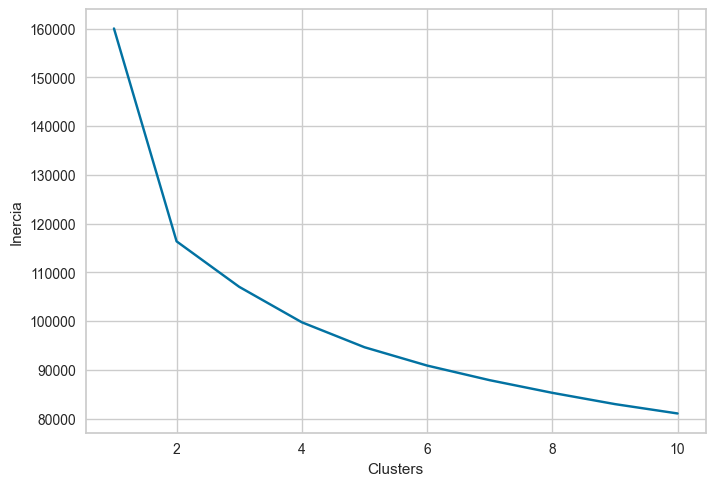

In [50]:
#chart results
sns.lineplot(data=inercias_results, x="num_clus", y="inercia")

#labels
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show();

#### Silhouette Score

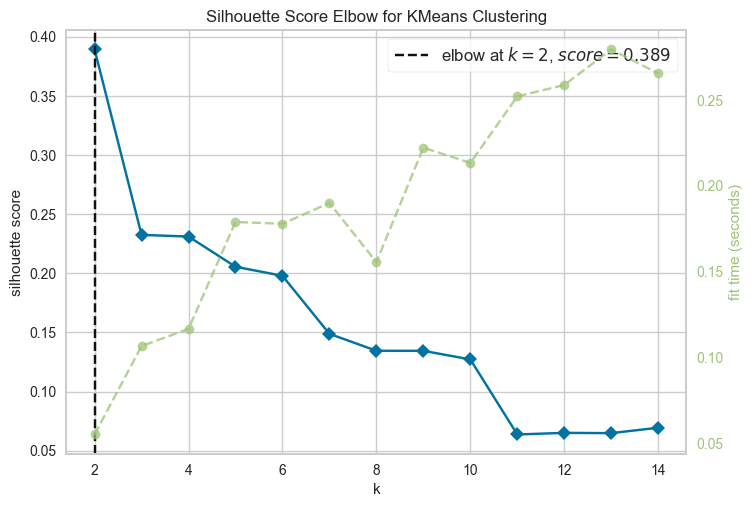

In [51]:
# we will define 3 clusters 

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

visualizer.fit(data_women_model)  

visualizer.show();

### K-Means

In [52]:
#model 
kmeans = KMeans(n_clusters=3)

#fit
km_fit = kmeans.fit(data_women_model)

In [53]:
# clusters
labels = km_fit.labels_
labels

array([1, 1, 0, ..., 2, 2, 1], dtype=int32)

In [54]:
# centers
centroids = km_fit.cluster_centers_
centroids[0]

array([0.43896104, 0.07792208, 0.06320346, 0.03376623, 0.04588745,
       0.06060606, 0.04502165, 0.03116883, 0.004329  , 0.01645022,
       0.07965368, 0.0025974 , 0.03982684, 0.04242424, 0.01818182,
       0.14718615, 0.45800866, 0.00779221, 0.38701299, 0.38748992,
       0.64266514, 1.06071313, 0.75218278, 1.14711829, 1.02553072,
       1.39006228, 1.24245884, 1.53468282, 1.70188864, 1.5261061 ,
       1.24013264, 1.79042504, 1.36413798, 1.42991856, 1.45471325,
       1.41939854])

### Clusters 

In [55]:
data_women_model['cluster'] = labels
data_women_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.809008,-0.49009,-0.742306,0.284019,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.825080,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.184378,0.258559,-0.303779,-0.499719,-0.809008,-0.49009,-0.010430,0.010956,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.825080,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,2.270601,0.570164,-0.636145,0.07351,3.283013,-0.262107,1.988405,1.704327,-0.247338,2.373973,2.105975,0.170706,0.329804,0.548553,4.079763,0


### Visualization 

In [56]:
data_women_model.head()

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.809008,-0.49009,-0.742306,0.284019,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.825080,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.184378,0.258559,-0.303779,-0.499719,-0.809008,-0.49009,-0.010430,0.010956,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.825080,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,2.270601,0.570164,-0.636145,0.07351,3.283013,-0.262107,1.988405,1.704327,-0.247338,2.373973,2.105975,0.170706,0.329804,0.548553,4.079763,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,1.568527,1.100428,-0.499719,1.265354,4.58231,0.965405,1.376272,0.235733,2.643220,1.478504,1.758566,1.562275,2.441281,-0.847798,-0.497190,4.733742,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.636145,-0.49009,-0.742306,-0.808233,-0.815870,-1.112350,-0.740436,-0.703061,-0.793754,-0.877251,-0.847798,-0.497190,-0.825080,1


In [57]:
features = data_women_model.drop(columns=['cluster'])

In [58]:
pca = PCA(n_components=2)

data_transformed = pd.DataFrame(pca.fit_transform(features), columns=["PC1", "PC2"])
data_transformed.head(3)

,PC1,PC2
0,-2.328745,-0.245622
1,-1.290519,0.110790
2,4.571227,3.443399


In [59]:
data_transformed['cluster'] = data_women_model['cluster']

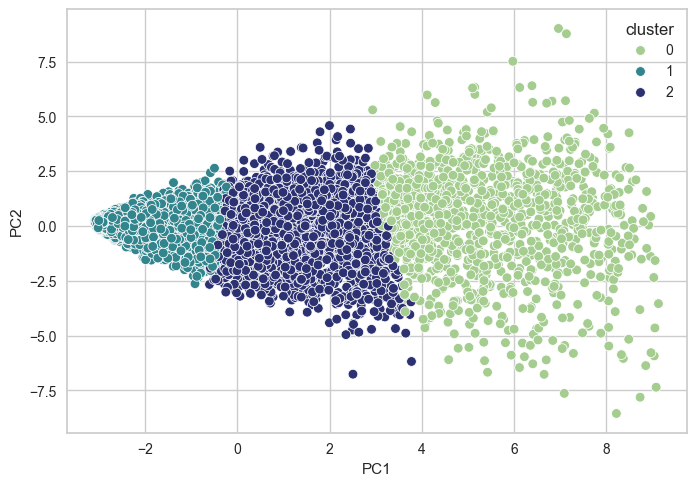

In [60]:
pca_plot = sns.scatterplot(x=data_transformed["PC1"],
                           y=data_transformed["PC2"],
                           hue=data_transformed["cluster"],
                           palette="crest")

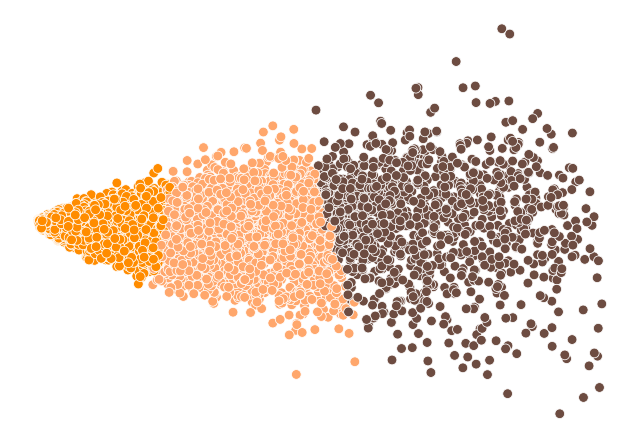

In [61]:
custom_palette = ["#6D4C41", "#FF8C00", "#FFA76C"]

pca_plot = sns.scatterplot(x=data_transformed["PC1"],
                           y=data_transformed["PC2"],
                           hue=data_transformed["cluster"],
                           palette=custom_palette)  # Change the palette to a warm color scheme (e.g., Oranges)

pca_plot.set_axis_off()
pca_plot.get_legend().remove()
pca_plot.tick_params(left=False, bottom=False)

pca_plot.patch.set_facecolor('white')

plt.savefig('../images/clusters_women.png', bbox_inches='tight', dpi=300) 

### Evaluation

#### Silhouette score

In [62]:
silhouette_score(data_women_model, labels)

0.2484293875814499

## Export clusters 

In [63]:
data_women_model['client_id'] = client_id

In [64]:
data_women_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster,client_id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.184378,-0.614752,-0.537814,0.035222,-0.809008,-0.49009,-0.742306,0.284019,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.82508,1,76154
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.184378,0.258559,-0.303779,-0.499719,-0.809008,-0.49009,-0.010430,0.010956,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.82508,1,292032


In [65]:
data_women_model.shape

(8748, 38)

In [66]:
data_women_labels = data_women_model.iloc[:,[37,36]]
data_women_labels.head(3)

,client_id,cluster
0,76154,1
1,292032,1
2,513675,0


In [67]:
data_women_labels.to_csv('../data/clusters/clusters_women.csv',index=False)